In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

# Cleaning

In [5]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

In [0]:
#Impute missing value with mean
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

In [7]:
data.isnull().sum().sort_values(ascending=False).head()

TENURE               0
PRC_FULL_PAYMENT     0
BALANCE              0
BALANCE_FREQUENCY    0
PURCHASES            0
dtype: int64

# Exploratory Data Analysis

### How many rows/columns are there?

In [8]:
data.shape

(8950, 18)

### How many customers are there?

In [9]:
data['CUST_ID'].nunique()

8950

This means, all customer on our data is unique.

### How does the credit limit distribution of our customers look like?





Descriptive Statistics

In [10]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4494.449450
std       3638.612411
min         50.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

The credit limit ranges from 50 to 30000 with an average (median) annual income is 3000.

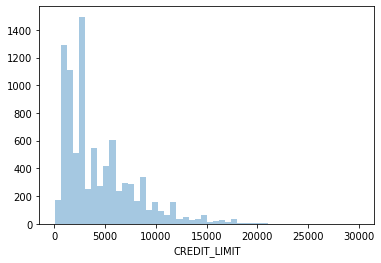

In [11]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

### How does the payment distribution look like?

In [12]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
10%        179.617069
20%        313.141031
30%        459.438287
40%        624.268198
50%        856.901546
60%       1185.259270
70%       1604.092113
80%       2314.017654
90%       3923.906642
max      50721.483360
Name: PAYMENTS, dtype: float64

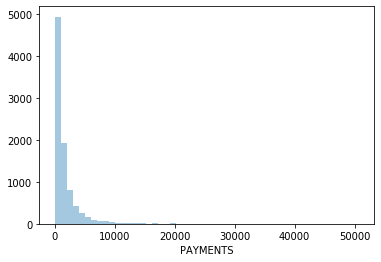

In [13]:
sns.distplot(data['PAYMENTS'], kde=False)

# Clustering

In [0]:
from sklearn.cluster import KMeans

In [15]:
# Get features we need
features = ['CREDIT_LIMIT', 'PURCHASES', 'PURCHASES_TRX','CASH_ADVANCE','CASH_ADVANCE_TRX']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX
0,1000.0,95.40,2,0.000000,0
1,7000.0,0.00,0,6442.945483,4
2,7500.0,773.17,12,0.000000,0
3,7500.0,1499.00,1,205.788017,1
4,1200.0,16.00,1,0.000000,0


### Choosing Optimal *k*

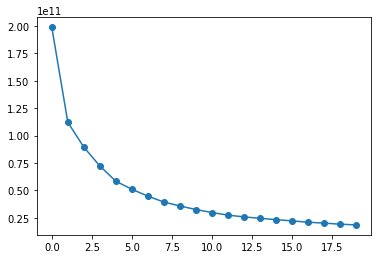

In [16]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=5*.

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=5, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [18]:
new_data.head()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX,labels
0,1000.0,95.40,2,0.000000,0,3
1,7000.0,0.00,0,6442.945483,4,1
2,7500.0,773.17,12,0.000000,0,0
3,7500.0,1499.00,1,205.788017,1,0
4,1200.0,16.00,1,0.000000,0,3


# Deep Dive to each cluster

In [19]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX,labels
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.0
mean,6360.430833,1338.365020,19.840946,862.177794,3.062901,0.0
std,1416.105720,1753.030841,28.240180,1338.003560,5.946897,0.0
min,2800.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5000.000000,128.240000,2.000000,0.000000,0.000000,0.0
50%,6000.000000,729.255000,11.000000,0.000000,0.000000,0.0
75%,7500.000000,1915.215000,26.000000,1465.072629,4.000000,0.0
max,9700.000000,15704.040000,309.000000,5411.208676,52.000000,0.0


Cluster 0: Mid Credit Limit & Mid Purchases & Low Cash Advance




In [20]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX,labels
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.0
mean,9104.545455,691.145606,9.876263,8100.047963,17.101010,1.0
std,2813.955646,1419.760706,23.879600,4274.851284,16.391875,0.0
min,1200.000000,0.000000,0.000000,3702.475695,1.000000,1.0
25%,7000.000000,0.000000,0.000000,5571.712849,8.000000,1.0
50%,9000.000000,96.370000,1.000000,6954.632394,13.000000,1.0
75%,10500.000000,783.482500,10.000000,9319.139195,21.000000,1.0
max,19600.000000,12551.950000,308.000000,47137.211760,123.000000,1.0


Cluster 1: Mid Credit Limit & Mid Purchases & Mid Cash Advance

In [21]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX,labels
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.0
mean,12591.180556,2617.974319,32.647222,885.361400,2.506944,2.0
std,2909.321859,2975.602634,40.296681,1465.863830,4.737030,0.0
min,8000.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,10500.000000,375.360000,5.000000,0.000000,0.000000,2.0
50%,12000.000000,1507.350000,19.000000,0.000000,0.000000,2.0
75%,14000.000000,3929.812500,44.000000,1391.582437,3.000000,2.0
max,30000.000000,14454.980000,274.000000,7424.094447,40.000000,2.0


Cluster 2: High Credit Limit & Mid Purchase & Low Cash Advance

In [22]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX,labels
count,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.0
mean,2111.798309,516.457879,9.546242,515.744249,2.413261,3.0
std,981.917498,758.464038,13.534891,920.172586,4.849920,0.0
min,50.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,1200.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,2000.000000,247.450000,6.000000,0.000000,0.000000,3.0
75%,3000.000000,671.360000,12.000000,724.694411,3.000000,3.0
max,4400.000000,8591.310000,186.000000,7003.112284,123.000000,3.0


Cluster 3: Low Credit Limit & Low Purchase & Low Cash Advance ( Wais- people who don't spend much money)

In [23]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,CREDIT_LIMIT,PURCHASES,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_TRX,labels
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,16106.896552,25434.969655,139.034483,887.422949,1.482759,4.0
std,5303.902272,8876.408034,99.686467,3651.436222,6.500663,0.0
min,7500.000000,14300.980000,3.000000,0.000000,0.000000,4.0
25%,12000.000000,20421.590000,70.000000,0.000000,0.000000,4.0
50%,16500.000000,22746.810000,114.000000,0.000000,0.000000,4.0
75%,18000.000000,27957.680000,195.000000,0.000000,0.000000,4.0
max,30000.000000,49039.570000,358.000000,19513.474830,35.000000,4.0


Cluster 4: High Credit Limit & Mid Purchase & Mid Cash Advance